In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import regularizers

input_shape = (64, 64, 3)
img_width = 64
img_height = 64

nb_train_samples = 2637
nb_validation_samples = 660
batch_size = 16
epochs = 25

train_data_dir = 'skin_cancer/train'
validation_data_dir = 'skin_cancer/test'

datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,       
                            zoom_range=0.2,
                            rotation_range = 30,
                            horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [2]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = input_shape, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(units = 512, activation = 'relu', kernel_regularizer = regularizers.l2(0.01),
               bias_regularizer= regularizers.l2(0.01)))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0

In [3]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/25
164/164 [==============================] - 21s 117ms/step - loss: 2.0874 - accuracy: 0.5573 - val_loss: 0.5103 - val_accuracy: 0.7607
Epoch 2/25
164/164 [==============================] - 18s 109ms/step - loss: 0.5365 - accuracy: 0.7575 - val_loss: 0.4869 - val_accuracy: 0.7683
Epoch 3/25
164/164 [==============================] - 18s 112ms/step - loss: 0.5041 - accuracy: 0.7752 - val_loss: 0.4726 - val_accuracy: 0.7729
Epoch 4/25
164/164 [==============================] - 18s 112ms/step - loss: 0.4640 - accuracy: 0.7855 - val_loss: 0.4333 - val_accuracy: 0.7835
Epoch 5/25
164/164 [==============================] - 18s 109ms/step - loss: 0.4774 - accuracy: 0.7875 - val_loss: 0.4932 - val_accuracy: 0.7424
Epoch 6/25
164/164 [==============================] - 18s 109ms/step - loss: 0.4674 - accuracy: 0.7728 - val_loss: 0.4269 - val_accuracy: 0.8186
Epoch 7/25
164/164 [==============================] - 18s 110ms/step - loss: 0.4732 - accuracy: 0.7670 - val_loss: 0.4112 - val_ac

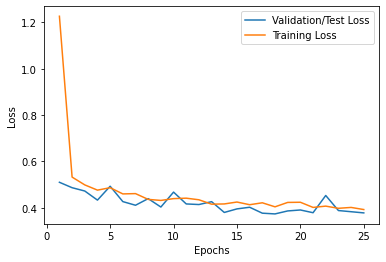

In [4]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

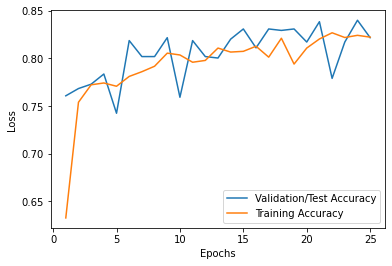

In [5]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
model.save('skin_cancer.h5')

In [20]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import load_model

classifier = load_model("skin_cancer.h5")
test_image = image.load_img('ben1.jpg',target_size = (64,64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

if result[0][0]==1:
    prediction = 'mel'
    print(prediction)
elif result[0][0]==0:
    prediction='ben'
    print(prediction)
print(result)

ben
[[0.]]
